In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Consumer Staples 200-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),S&P 500 Consumer Staples (Sector) Outperform/Underperform,overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel
4178,2009-12-02,1109.24,279.739990,-2.929002,-2.969129,UNDERPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4179,2009-12-03,1099.92,277.600006,-3.497166,-3.601068,UNDERPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4180,2009-12-04,1105.98,278.859985,-2.494975,-3.257594,UNDERPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4181,2009-12-07,1103.25,278.690002,-1.918512,-2.681843,UNDERPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4182,2009-12-08,1091.94,275.989990,-4.938755,-4.814631,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,759.030029,19.548197,1.760290,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7195,2021-11-26,4594.62,748.440002,16.437110,0.446916,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7196,2021-11-29,4655.27,752.330017,19.324593,1.871336,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7197,2021-11-30,4567.00,731.760010,17.908879,-1.165603,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),S&P 500 Consumer Staples (Sector) Outperform/Underperform,overall,food and beverages,...,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,2009,12,2009-12-10,1102.35,277.260010,-3.951381,-4.590501,UNDERPERFORM,217.488,218.855,...,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083,3
1,2010,1,2010-01-14,1148.46,279.160004,-2.941027,-5.810109,UNDERPERFORM,217.281,218.898,...,204.675,126.819,99.689,785.135,220.258,128.812,114.772,117.864,109.921,3
2,2010,2,2010-02-11,1078.47,273.260010,-9.326551,-7.253163,OUTPERFORM,217.353,219.321,...,204.268,126.420,99.369,789.437,221.409,128.068,114.977,118.207,110.556,3
3,2010,3,2010-03-11,1150.24,282.130005,-8.476491,-7.279477,OUTPERFORM,217.403,219.531,...,203.898,125.751,98.753,793.360,221.387,128.296,114.794,117.661,109.688,3
4,2010,4,2010-04-08,1186.44,286.839996,-7.551331,-5.709870,OUTPERFORM,217.290,219.651,...,203.461,125.687,98.588,803.484,221.727,127.650,114.873,117.508,109.725,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,720.650024,1.147999,-12.932375,UNDERPERFORM,273.092,278.062,...,242.236,132.316,96.118,1254.492,268.392,138.788,113.605,119.623,102.393,3
140,2021,8,2021-08-12,4460.83,743.869995,7.276877,-4.369680,UNDERPERFORM,274.214,280.413,...,243.569,133.582,97.280,1263.542,271.322,139.549,114.660,119.364,100.292,3
141,2021,9,2021-09-09,4493.28,747.330017,15.209058,-1.265667,UNDERPERFORM,276.590,282.661,...,246.523,134.667,98.022,1287.067,274.278,139.544,115.831,120.101,101.919,3
142,2021,10,2021-10-14,4438.26,736.159973,8.483351,-5.263432,UNDERPERFORM,278.524,284.676,...,249.378,135.808,98.848,1298.746,275.508,140.361,115.896,122.129,102.875,3


In [4]:
original = data[['S&P 500 Consumer Staples (Sector) Outperform/Underperform','month','overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]

In [5]:
data.drop(columns=['date','S&P 500 Consumer Staples (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,12,1102.35,277.260010,-3.951381,-4.590501,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083,3
1,1,1148.46,279.160004,-2.941027,-5.810109,217.281,218.898,218.552,204.675,126.819,99.689,785.135,220.258,128.812,114.772,117.864,109.921,3
2,2,1078.47,273.260010,-9.326551,-7.253163,217.353,219.321,218.990,204.268,126.420,99.369,789.437,221.409,128.068,114.977,118.207,110.556,3
3,3,1150.24,282.130005,-8.476491,-7.279477,217.403,219.531,219.209,203.898,125.751,98.753,793.360,221.387,128.296,114.794,117.661,109.688,3
4,4,1186.44,286.839996,-7.551331,-5.709870,217.290,219.651,219.331,203.461,125.687,98.588,803.484,221.727,127.650,114.873,117.508,109.725,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Consumer Staples (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,14
Size in Memory,15.9 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.57,0.50,2,82
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
food and beverages,float64,0,0,218.85,247.53,286.018,246.67,15.53,144,1
food,float64,0,0,218.49,247.74,287.44,246.92,15.83,144,1
nondurables,float64,0,0,202.87,223.85,250.94,222.54,8.43,143,2
household furnishings and operations,float64,0,0,120.28,124.20,137.30,124.32,2.96,144,1
household furnishings and supplies,float64,0,0,89.35,93.52,100.22,94.082,3.18,143,2
tobacco and smoking products,float64,0,0,784.69,949.31,1308.024,983.34,138.14,144,1
domestically produced farm food,float64,0,0,219.86,247.36,276.52,245.84,11.52,144,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

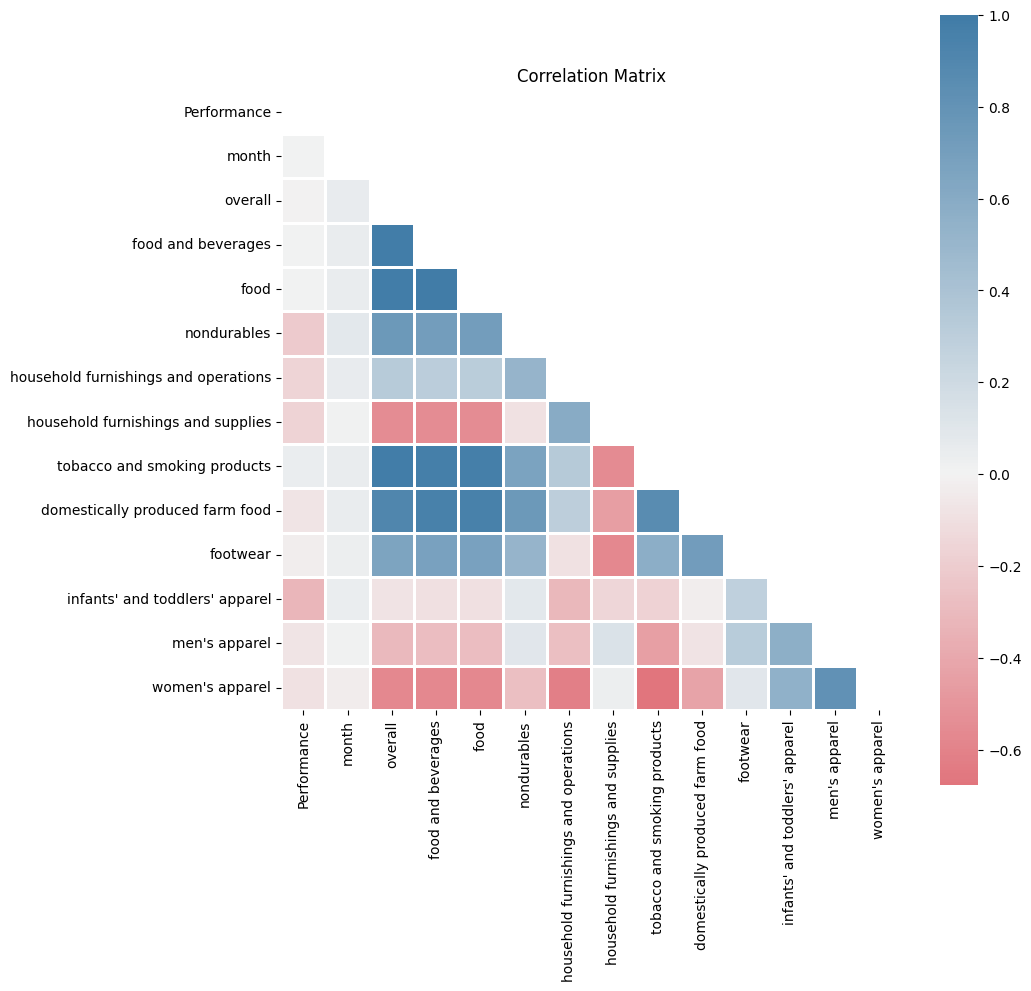

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,1,2173.432130,613.410626,-1.408091,2.915224,240.620371,248.470946,262.879194,216.018520,119.946762,89.293846,908.438063,250.050489,138.006695,119.882586,119.964404,110.568423,3
1,7,1224.746991,338.243867,0.758190,-6.016112,220.077943,222.353675,228.829490,214.932441,127.056537,99.013147,754.838118,222.783265,131.515725,113.601560,122.841844,109.540113,3
2,6,3416.773903,680.474937,-0.698463,-13.546474,251.893861,254.011459,262.949837,219.512628,120.702174,90.661255,1112.923229,250.417596,137.838021,118.459640,116.388046,98.893121,3
3,5,2202.468250,702.027596,-0.203295,-4.789342,253.152629,257.740505,275.598572,229.269997,136.128709,98.453932,1255.843781,262.129840,132.667757,111.637073,113.282561,95.904123,3
4,6,3173.787912,724.305934,-0.640080,-0.247783,270.243030,269.709603,283.532452,244.215035,127.041231,92.339806,1204.373678,255.481066,135.553860,114.537676,117.477626,95.757673,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2381.041245,641.461398,-10.084163,-8.595663,250.674654,271.756580,263.520634,227.166063,124.480917,91.530151,1143.707080,249.044097,137.037329,117.913984,121.527088,98.462830,3
9996,8,1422.852760,337.434601,-6.708921,-9.492489,221.623705,238.527646,240.654665,225.710703,124.425197,97.644877,881.650778,239.170245,134.362733,119.180781,126.971637,116.954016,3
9997,1,1837.154175,519.268216,-2.821874,-4.193709,233.964716,226.076933,239.398815,215.417601,121.519537,94.380958,897.816798,249.209640,135.485470,117.530064,124.723825,114.962856,3
9998,12,2019.747425,404.566138,-6.106795,-11.674857,245.801395,257.115377,248.228371,205.509784,127.185890,98.481226,874.689890,218.573000,130.641358,114.800428,114.812963,103.079675,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Consumer Staples (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]
samples.head()

,Performance,month,overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel
0,1,1,240.620371,248.470946,262.879194,216.018520,119.946762,89.293846,908.438063,250.050489,138.006695,119.882586,119.964404,110.568423
1,0,7,220.077943,222.353675,228.829490,214.932441,127.056537,99.013147,754.838118,222.783265,131.515725,113.601560,122.841844,109.540113
2,0,6,251.893861,254.011459,262.949837,219.512628,120.702174,90.661255,1112.923229,250.417596,137.838021,118.459640,116.388046,98.893121
3,0,5,253.152629,257.740505,275.598572,229.269997,136.128709,98.453932,1255.843781,262.129840,132.667757,111.637073,113.282561,95.904123
4,1,6,270.243030,269.709603,283.532452,244.215035,127.041231,92.339806,1204.373678,255.481066,135.553860,114.537676,117.477626,95.757673


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,14
Size in Memory,1.1 MB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.42,0.49,2,5765
month,int64,0,0,1,6,12,6.47,3.45,12,894
overall,float64,0,0,203.43,241.14,293.025,241.57,16.090,10000,1
food and beverages,float64,0,0,202.82,246.64,288.64,245.014,16.23,10000,1
food,float64,0,0,204.29,249.21,308.46,250.25,17.90,9999,2
nondurables,float64,0,0,191.49,221.21,263.67,221.55,9.75,10000,1
household furnishings and operations,float64,0,0,118.83,123.89,143.92,124.25,3.66,10000,1
household furnishings and supplies,float64,0,0,87.89,93.25,101.65,94.43,3.36,10000,1
tobacco and smoking products,float64,0,0,698.75,928.28,1436.67,971.60,143.97,9999,2
domestically produced farm food,float64,0,0,204.058,247.63,277.62,243.87,13.49,10000,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

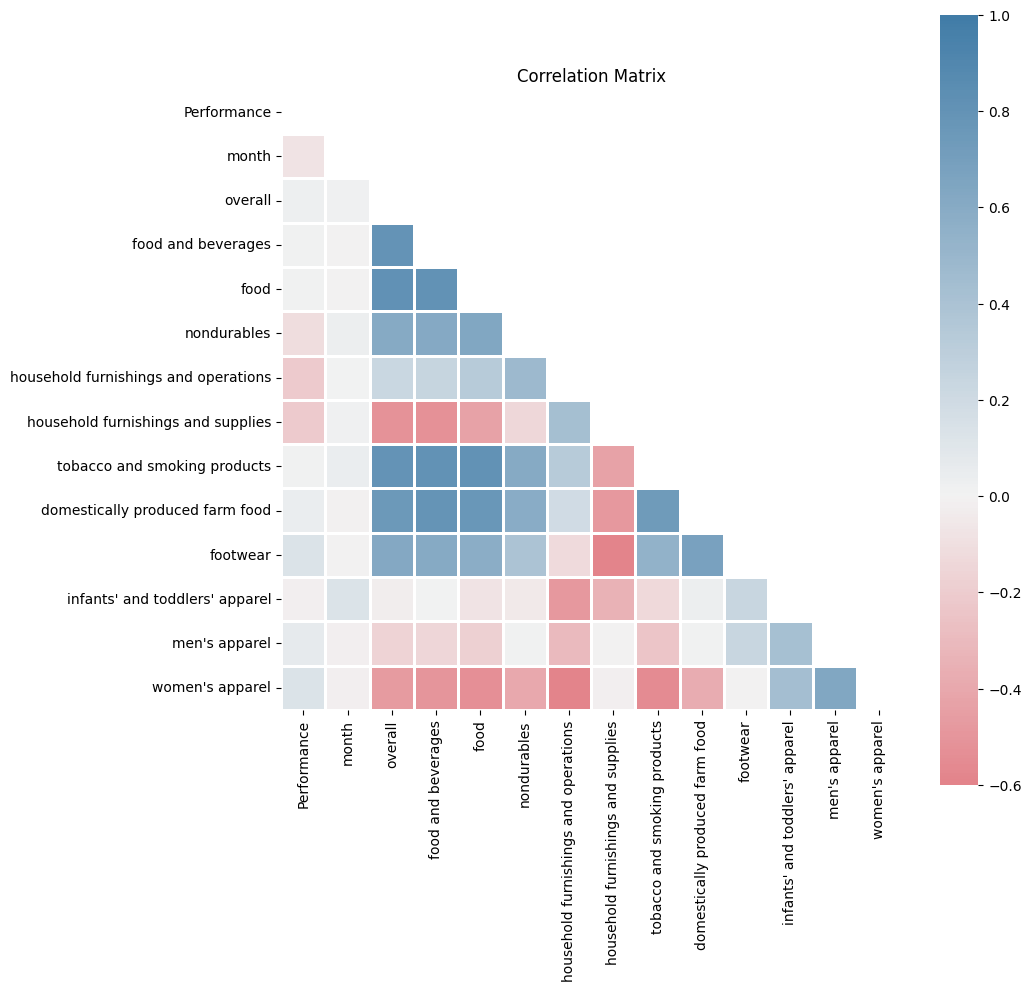

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 5765, 1: 4235})
Counter({1: 5765, 0: 5765})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  240.62037094,   248.47094576,   262.8791938 , ...,
        14381.64296536, 13255.22841876, 13264.27499609],
       [  220.07794263,   222.35367486,   228.82949016, ...,
        13955.02513295, 12443.92778463, 13456.10954561],
       [  251.89386064,   254.0114592 ,   262.94983682, ...,
        13787.28594881, 11714.84345523, 11509.97704938],
       ...,
       [  250.4832331 ,   271.55483045,   262.68753228, ...,
        13720.24888375, 11398.2463779 , 11587.99343667],
       [  220.57642118,   235.18850246,   229.59595289, ...,
        14729.35016765, 13665.8991676 , 14409.02078112],
       [  263.52779381,   257.45040869,   269.74388037, ...,
        12928.45939955, 11757.49177358, 12385.51387591]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(11530, 79)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 79)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.651518,0.631057,0.726484,0.675116,0.654873,0.633657,0.726829,0.677053,0.6875,0.74026,0.695122,0.716981
1,DecisionTreeClassifier,0.627147,0.62247,0.639414,0.63021,0.62435,0.619728,0.634843,0.627194,0.590278,0.657534,0.585366,0.619355
2,RandomForestClassifier,0.709107,0.69914,0.72876,0.712022,0.704475,0.697895,0.716376,0.707015,0.625,0.689189,0.621951,0.653846
3,AdaBoostClassifier,0.660971,0.646826,0.708604,0.676088,0.660076,0.646114,0.701045,0.67246,0.625,0.684211,0.634146,0.658228
4,GradientBoostingClassifier,0.674848,0.661382,0.715891,0.687347,0.678113,0.665362,0.710801,0.687332,0.618056,0.675325,0.634146,0.654088
5,ExtraTreesClassifier,0.719688,0.705216,0.748188,0.724077,0.71488,0.704743,0.735192,0.719645,0.638889,0.708333,0.621951,0.662338
6,BaggingClassifier,0.677884,0.692585,0.63249,0.65973,0.667707,0.685603,0.613937,0.647794,0.597222,0.693548,0.52439,0.597222
7,SVC,0.668604,0.647021,0.742079,0.691144,0.672216,0.651048,0.735889,0.690873,0.645833,0.663158,0.768293,0.711864
8,GaussianNB,0.608413,0.584994,0.746926,0.656036,0.61984,0.592775,0.754704,0.66401,0.520833,0.563107,0.707317,0.627027


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.707249,0.695307,0.733101,0.713704
